In [166]:
# First try to use the data to train a model
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

In [167]:
# Load the dataset from the file
df = pd.read_csv('myData.csv', header = None)

df.head()

Dataset = df.values

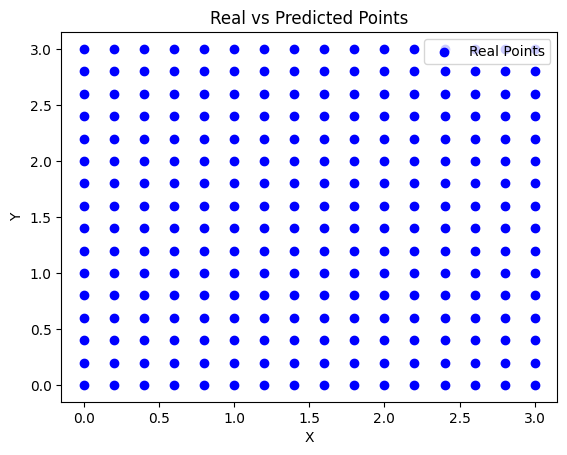

[6.00000000e-01 0.00000000e+00 3.10160798e-04 2.10658906e-04
 1.72449129e-04 9.50189784e-05 1.04660212e-04 1.18352731e-04
 0.00000000e+00 0.00000000e+00 2.16194971e-05 0.00000000e+00
 0.00000000e+00 5.19284949e-05 5.02432399e-04 5.79166013e-04
 5.48777198e-04 7.81902847e-05 2.29591124e-04 3.45666884e-04
 0.00000000e+00 0.00000000e+00 1.12613047e-04 0.00000000e+00
 6.89817873e-05 2.32538053e-04 4.13075458e-04 5.93412721e-04
 6.79975167e-04 2.70197916e-04 5.44714824e-04 6.50771407e-04
 0.00000000e+00 0.00000000e+00 2.37453933e-04 0.00000000e+00
 0.00000000e+00 2.53742410e-04 2.83716257e-04 2.08943574e-04
 1.94947665e-04 1.69828156e-04 1.95912414e-04 1.88227912e-04
 0.00000000e+00 0.00000000e+00 4.48436511e-05 0.00000000e+00
 0.00000000e+00 4.84491389e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.99956842e-04 5.38491936e-05
 3.72487712e-05 5.663152

In [168]:
starting_X = 3.0;
starting_Y = 0.0;
arr = np.zeros((1, 0));
X = np.empty(256, dtype = object);
Y = np.empty(256, dtype = object);

new_arr = np.empty((256, 98));

for i in range(0, 256):
    if i < 16:
        true_X = starting_X - i*0.2;
        true_Y = starting_Y;
    elif i < 32:
        true_X = 0.0 + (i-16)*0.2;
        true_Y = starting_Y + 0.2;
    elif i < 48:
        true_X = starting_X - (i-32)*0.2;
        true_Y = starting_Y + 0.4;
    elif i < 64:
        true_X = 0.0 + (i-48)*0.2;
        true_Y = starting_Y + 0.6;
    elif i < 80:
        true_X = starting_X - (i-64)*0.2;
        true_Y = starting_Y + 0.8;
    elif i < 96:
        true_X = 0.0 + (i-80)*0.2;
        true_Y = starting_Y + 1.0;
    elif i < 112:
        true_X = starting_X - (i-96)*0.2;
        true_Y = starting_Y + 1.20;
    elif i < 128:
        true_X = 0.0 + (i-112)*0.2;
        true_Y = starting_Y + 1.40;
    elif i < 144:
        true_X = starting_X - (i-128)*0.2;
        true_Y = starting_Y + 1.60;
    elif i < 160:
        true_X = 0.0 + (i-144)*0.2;
        true_Y = starting_Y + 1.80;
    elif i < 176:
        true_X = starting_X - (i-160)*0.2;
        true_Y = starting_Y + 2.0;
    elif i < 192:
        true_X = 0.0 + (i-176)*0.2;
        true_Y = starting_Y + 2.20;
    elif i < 208:
        true_X = starting_X - (i-192)*0.2;
        true_Y = starting_Y + 2.40;
    elif i < 224:
        true_X = 0.0 + (i-208)*0.2;
        true_Y = starting_Y + 2.60;
    elif i < 240:
        true_X = starting_X - (i-224)*0.2;
        true_Y = starting_Y + 2.80;
    elif i < 256:
        true_X = 0.0 + (i-240)*0.2;
        true_Y = starting_Y + 3.0;

            
    new_arr[i,:] = np.array([true_X, true_Y, Dataset[i, 0], Dataset[i, 1], Dataset[i, 2], Dataset[i, 3], Dataset[i, 4], Dataset[i, 5], Dataset[i, 6], Dataset[i, 7], Dataset[i, 8], Dataset[i, 9], Dataset[i, 10], Dataset[i, 11], Dataset[i, 12], Dataset[i, 13], Dataset[i, 14], Dataset[i, 15], Dataset[i, 16], Dataset[i, 17], Dataset[i, 18], Dataset[i, 19], Dataset[i, 20], Dataset[i, 21], Dataset[i, 22], Dataset[i, 23], Dataset[i, 24], Dataset[i, 25], Dataset[i, 26], Dataset[i, 27], Dataset[i, 28], Dataset[i, 29], Dataset[i, 30], Dataset[i, 31], Dataset[i, 32], Dataset[i, 33], Dataset[i, 34], Dataset[i, 35], Dataset[i, 36], Dataset[i, 37], Dataset[i, 38], Dataset[i, 39], Dataset[i, 40], Dataset[i, 41], Dataset[i, 42], Dataset[i, 43], Dataset[i, 44], Dataset[i, 45], Dataset[i, 46], Dataset[i, 47], Dataset[i, 48], Dataset[i, 49], Dataset[i,50], Dataset[i,51], Dataset[i,52], Dataset[i,53], Dataset[i,54], Dataset[i,55], Dataset[i,56], Dataset[i,57], Dataset[i,58], Dataset[i,59], Dataset[i,60], Dataset[i,61], Dataset[i,62], Dataset[i,63], Dataset[i,64], Dataset[i,65], Dataset[i,66], Dataset[i,67], Dataset[i,68], Dataset[i,69], Dataset[i,70], Dataset[i,71], Dataset[i,72], Dataset[i,73], Dataset[i,74], Dataset[i,75], Dataset[i,76], Dataset[i,77], Dataset[i,78], Dataset[i,79], Dataset[i,80], Dataset[i,81], Dataset[i,82], Dataset[i,83], Dataset[i,84], Dataset[i,85], Dataset[i,86], Dataset[i,87], Dataset[i,88], Dataset[i,89], Dataset[i,90], Dataset[i,91], Dataset[i,92], Dataset[i,93], Dataset[i,94], Dataset[i,95]])

    

# print(arr)
# print (df)

plt.scatter(new_arr[:,0], new_arr[:,1], color='blue', label='Real Points')

# # Set the x-axis label to "X"
plt.xlabel('X')

# # Set the y-axis label to "Y"
plt.ylabel('Y')

# # Set the title of the plot to "Real vs Predicted Points"
plt.title('Real vs Predicted Points')

# # Add a legend to the plot
plt.legend()

# Show the plot
plt.show()
        
print(new_arr[12,:])


In [200]:
# Machine Learning - Prepare the data

X = new_arr[:, 2:98];
Y = new_arr[:, 0:2];

# print(X[0,:])
# print(Y)

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

print(X[5,:])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 16)

print(X_train[0,:])
print(X_test[16,:])

[0.         0.         0.16382132 0.         0.08283827 0.22907576
 0.85840345 0.77099944 0.52689258 0.41105691 0.8283193  0.51790525
 0.         0.         0.03211436 0.         0.         0.04664458
 0.66858626 0.26282032 0.14719955 0.40788583 0.19120481 0.12532763
 0.         0.         0.01357426 0.         0.01611025 0.03867438
 0.85159459 0.2100917  0.10369649 0.16264957 0.0764904  0.061946
 0.         0.         0.05840813 0.         0.11845808 0.15818391
 1.         0.85601968 0.41404611 0.20295943 0.22077104 0.20116717
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.55892692 0.77675584 0.         0.18171141 0.52046818
 0.91698022 0.79646803 0.77675584 0.48053343 1.         0.97236383
 0.         0.         0.00896716 0.         0.         0.00618707
 0.42868955 0.06558403 0.03610468 0.30028143 0.08665681 0.04277183
 0.         0.         0.         0.         0.00295957 0.00655697
 0.48199895 0

In [170]:
# Machine Learning - Build the model

model = Sequential()

# model.add(Dense(1536, activation = 'relu', input_shape = (48,))) # input layerr
# model.add(Dropout(0.2))
# model.add(Dense(768, activation = 'relu')) # input layerr
# model.add(Dropout(0.1))
# model.add(Dense(384, activation = 'relu')) # input layerr
# model.add(Dense(192, activation = 'relu')) # input layerr
# model.add(Dense(96, activation = 'relu')) # input layer
model.add(Dense(96, activation = 'relu', input_shape = (96,))) # input layer
model.add(Dense(84, activation = 'relu'))
model.add(Dense(72, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(48, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'linear'))

model.summary()


# model.compile(loss = 'SparseCategori', optimizer = 'adam', metrics = ['accuracy'])
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 96)                9312      
                                                                 
 dense_114 (Dense)           (None, 84)                8148      
                                                                 
 dense_115 (Dense)           (None, 72)                6120      
                                                                 
 dense_116 (Dense)           (None, 60)                4380      
                                                                 
 dense_117 (Dense)           (None, 48)                2928      
                                                                 
 dense_118 (Dense)           (None, 24)                1176      
                                                                 
 dense_119 (Dense)           (None, 12)              

In [171]:
# Machine Learning - Train the model

model.fit(X_train, Y_train, epochs = 500, batch_size = 16, validation_data = (X_test, Y_test), verbose = 1)

Epoch 1/500
12/12 [==============================] - 1s 10ms/step - loss: 2.9812 - accuracy: 0.4583 - val_loss: 3.3721 - val_accuracy: 0.5000
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 2.9435 - accuracy: 0.4583 - val_loss: 3.3283 - val_accuracy: 0.5000
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 2.9003 - accuracy: 0.4583 - val_loss: 3.2800 - val_accuracy: 0.5000
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 2.8462 - accuracy: 0.4583 - val_loss: 3.2055 - val_accuracy: 0.5000
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 2.6696 - accuracy: 0.4583 - val_loss: 2.8197 - val_accuracy: 0.5000
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 2.2308 - accuracy: 0.4583 - val_loss: 2.4714 - val_accuracy: 0.5000
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 1.9792 - accuracy: 0.4583 - val_loss: 2.3511 - val_accuracy: 0.5000
Epoch 8/500


In [172]:
# Machine Learning - Evaluate the model

mse = model.evaluate(X_test, Y_test, verbose = 1)
print("Mean Squared Error: ", mse)


2/2 [==============================] - 0s 2ms/step - loss: 0.9937 - accuracy: 0.7344
Mean Squared Error:  [0.9936685562133789, 0.734375]


In [173]:
# Load the dataset from the file
test = pd.read_csv('myDataTest.csv', header = None)

test.head()

Dataset_Test = test.values

In [174]:
starting_X = 3.0;
starting_Y = 0.0;
arr = np.zeros((1, 0));
X_test_2 = np.empty(30, dtype = object);
Y_test_2 = np.empty(30, dtype = object);

new_arr_test = np.empty((30, 50));

for i in range(0, 29):
    if i <= 5:
        true_X = starting_X - i*0.6;
        true_Y = starting_Y;
    elif i <= 10:
        true_X = 0.0 + (i-5)*0.6;
        true_Y = starting_Y + 0.6;
    elif i <= 15:
        true_X = starting_X - (i-10)*0.6;
        true_Y = starting_Y + 1.2;
    elif i <= 20:
        true_X = 0.0 + (i-15)*0.6;
        true_Y = starting_Y + 1.8;
    elif i <= 25:
        true_X = starting_X - (i-20)*0.6;
        true_Y = starting_Y + 2.4;
    elif i <= 30:
        true_X = 0.0 + (i-25)*0.6;
        true_Y = starting_Y + 3.0;

        
    new_arr_test[i,:] = np.array([true_X, true_Y, Dataset_Test[i, 0], Dataset_Test[i, 1], Dataset_Test[i, 2], Dataset_Test[i, 3], Dataset_Test[i, 4], Dataset_Test[i, 5], Dataset_Test[i, 6], Dataset_Test[i, 7], Dataset_Test[i, 8], Dataset_Test[i, 9], Dataset_Test[i, 10], Dataset_Test[i, 11], Dataset_Test[i, 12], Dataset_Test[i, 13], Dataset_Test[i, 14], Dataset_Test[i, 15], Dataset_Test[i, 16], Dataset_Test[i, 17], Dataset_Test[i, 18], Dataset_Test[i, 19], Dataset_Test[i, 20], Dataset_Test[i, 21], Dataset_Test[i, 22], Dataset_Test[i, 23], Dataset_Test[i, 24], Dataset_Test[i, 25], Dataset_Test[i, 26], Dataset_Test[i, 27], Dataset_Test[i, 28], Dataset_Test[i, 29], Dataset_Test[i, 30], Dataset_Test[i, 31], Dataset_Test[i, 32], Dataset_Test[i, 33], Dataset_Test[i, 34], Dataset_Test[i, 35], Dataset_Test[i, 36], Dataset_Test[i, 37], Dataset_Test[i, 38], Dataset_Test[i, 39], Dataset_Test[i, 40], Dataset_Test[i, 41], Dataset_Test[i, 42], Dataset_Test[i, 43], Dataset_Test[i, 44], Dataset_Test[i, 45], Dataset_Test[i, 46], Dataset_Test[i, 47]])

    
    
    
print(new_arr_test[11,:])
# print (df)

[2.40000000e+00 1.20000000e+00 0.00000000e+00 9.86345831e-05
 1.70002796e-04 2.94991801e-04 3.13640718e-04 2.97603998e-04
 0.00000000e+00 5.55601964e-05 1.39332949e-04 0.00000000e+00
 0.00000000e+00 6.04454379e-05 0.00000000e+00 1.00778973e-04
 3.09492753e-04 3.23612642e-04 5.14996786e-04 6.03883842e-04
 1.13682937e-05 2.52433233e-04 4.28608160e-04 0.00000000e+00
 0.00000000e+00 1.98822566e-04 0.00000000e+00 3.43138436e-06
 6.99308787e-05 2.37714863e-04 2.14060363e-04 2.01804856e-04
 4.86203643e-05 1.26126492e-04 1.53103209e-04 0.00000000e+00
 0.00000000e+00 4.29760888e-05 0.00000000e+00 1.83330034e-05
 4.95439167e-05 2.17652332e-04 1.49906719e-04 1.22716308e-04
 2.19563547e-06 4.25320924e-05 6.52372748e-05 0.00000000e+00
 0.00000000e+00 1.47314730e-05]


In [175]:
# Machine Learning - Make predictions
X_test_test = new_arr_test[:, 2:50];
# X_test_test = scaler.transform(X_test_test)
# X_for_test = X_test_test[1, :];
Y_test_test = new_arr_test[:, 0:2];
# Y_for_test = Y_test_test[1, :];


y_old_pred = model.predict(X_test)


y_pred_x = y_old_pred[:, 0]
y_pred_y = y_old_pred[:, 1]

# Round the predicted values to the nearest integer
y_pred_x = np.rint(y_pred_x.flatten())
y_pred_y = np.rint(y_pred_y.flatten())

# Combine the predicted x and y values into a single array of (x, y) tuples
y_pred = np.stack((y_pred_x, y_pred_y), axis=1)

# Calculate accuracy score
mse = metrics.mean_squared_error(Y_test, y_pred)
print("Mean squared error for test data: ", mse)

# X_test_test = scaler.transform(X_test_test)


# y_old_pred = model.predict(X_test_test)

# y_pred_x = y_old_pred[:, 0]
# y_pred_y = y_old_pred[:, 1]

# # Round the predicted values to the nearest integer
# y_pred_x = np.rint(y_pred_x.flatten())
# y_pred_y = np.rint(y_pred_y.flatten())

# # Combine the predicted x and y values into a single array of (x, y) tuples
# y_pred = np.stack((y_pred_x, y_pred_y), axis=1)

# # Calculate accuracy score
# mse = metrics.mean_squared_error(Y_test_test, y_pred)
# print("Mean squared error for new data: ", mse)

2/2 [==============================] - 0s 2ms/step
Mean squared error for test data:  1.0090624999999998


2/2 [==============================] - 0s 1ms/step


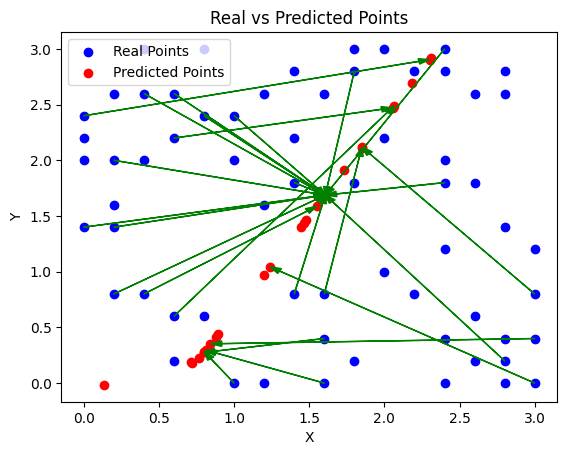

In [176]:

# Assume you have a trained model called "model"
# and a test set called X_test and y_test

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a scatter plot showing the real points in blue
plt.scatter(Y_test[:,0], Y_test[:,1], color='blue', label='Real Points')

x_pred = y_pred[:, 0]
y_pred = y_pred[:, 1]

# Create a scatter plot showing the predicted points in red
plt.scatter(x_pred, y_pred, color='red', label='Predicted Points')

# Loop through each point in the test set
for i in range(0 , 25):
    # Get the x and y coordinates for the real and predicted points
    x_real, y_real = Y_test[i]
    x_pred_arrow = x_pred[i]
    y_pred_arrow = y_pred[i]
    
    # Add an arrow from the real point to the predicted point
    plt.arrow(x_real, y_real, x_pred_arrow - x_real, y_pred_arrow - y_real, 
              length_includes_head=True, head_width=0.05, color='green')
    
# Set the x-axis label to "X"
plt.xlabel('X')

# Set the y-axis label to "Y"
plt.ylabel('Y')

# Set the title of the plot to "Real vs Predicted Points"
plt.title('Real vs Predicted Points')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()